# Index

1. [Data Analysis Study on US Fatal Police Attacks](#1)
2. [Importing the libraries and data](#2)
3. [Inspecting the fatal police shootings dataset and record observations](#3)
4. [Check correct datatypes for each variables like datatime , category, int etc.](#4)
5. [Analyzing the data](#5)
   * 5.1. [Age of the victims](#5.1) 
   * 5.2. [Dates and week days](#5.2)
   * 5.3. [Victim state and police body camera](#5.3)
   * 5.4. [Weapons and gender](#5.4)
   * 5.5. [Is USA police racist?](#5.5)
   * 5.6. [Poverty rate, median income and completed high school rate relationship with police shoting cases](#5.6)
   * 5.7. [States and cities with more fatal police shoting cases](#5.7)
6. [Conclusion](#6)

<a id="1"></a> 
# Data Analysis Study on US Fatal Police Attacks
In 2020 protests born in 2015 after the death of Michael Brown have sharpened exponentially after the killing by American police of George Floyd.
From 1 January 2015 the Washington Post holds a database of violent deaths by police in the US territory in the line of duty.

The data contain many details of the killing such as name of the victims, date of the event, race, age, gender, armed or not, etc..

The Washington Post collected this information from law enforcement websites, new local reports, social media, and by monitoring independent databases such as "Killed by Police" and "Fatal Dating". The Post has also conducted additional reporting in many cases.

An analysis of empirical data can help to understand whether the protests are founded and therefore whether the attitude of the American police towards ethnic minorities is subject to bias.

<a id="2"></a> 
# Importing the libraries and the dataframes

In [1]:
# Importing the libraries
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #  visualizations Python library 
import seaborn as sns # data visualization library
from collections import Counter # Counter is a dict subclass for counting hashable objects
from datetime import datetime # librariy for manipulating dates and times
import plotly.express as px # library for creating geo plot
import plotly.graph_objects as go # library for creating geo plot
import warnings # library to manage warnings
import plotly.offline as pyo # working offline display the plot in the notebook.
pyo.init_notebook_mode()

warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
pd.set_option('display.float_format', lambda x: '%.3f' % x) # set the number of decimals to display in float number
pd.set_option('display.max_columns', 500) # Set pandas to display a N number of columns
pd.set_option('display.max_rows', 60) # Set pandas to display a N number of rows

In [2]:
# Import of the data
df = pd.read_csv('../archive/fatal-police-shootings-data.csv')
pop_by_city = pd.read_csv('../archive/PopulationByCity.csv', encoding='iso-8859-1')
share_race_city = pd.read_csv('../archive/ShareRaceByCity.csv', encoding='iso-8859-1')
poverty = pd.read_csv('../archive/PercentagePeopleBelowPovertyLevel.csv', encoding='iso-8859-1')
highschool = pd.read_csv('../archive/PercentOver25CompletedHighSchool.csv', encoding='iso-8859-1')
income = pd.read_csv('../archive/MedianHouseholdIncome2015.csv', encoding='iso-8859-1')

<a id="3"></a> 
#  Inspecting the fatal police shootings dataset and record observations:
1. Check for attributes/columns, check if headers are clean
2. Number of row and columns in data set (Dimension of dataset)
3. What are the data types of your data, and how many columns are numeric?
4. Are the datatype correct?

In [3]:
#This function returns the first 5 rows for the dataset
df.head()

id                name        date   manner_of_death       armed    age  \
0   3          Tim Elliot  2015-01-02              shot         gun 53.000   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun 47.000   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed 23.000   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon 32.000   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun 39.000   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [4]:
#displays last 5 rows
df.tail()

id                  name        date   manner_of_death         armed  \
6228  6791  Doward Sylleen Baker  2021-04-19  shot and Tasered           gun   
6229  6790        Ma’Khia Bryant  2021-04-20              shot         knife   
6230  6793                   NaN  2021-04-21              shot    metal pole   
6231  6794          Andrew Brown  2021-04-21              shot  undetermined   
6232  6795       Phet Gouvonvong  2021-04-21              shot           gun   

        age gender race            city state  signs_of_mental_illness  \
6228 39.000      M    B          Dothan    AL                    False   
6229 16.000      F    B        Columbus    OH                    False   
6230    NaN      M  NaN       Escondido    CA                     True   
6231 42.000      M    B  Elizabeth City    NC                    False   
6232 31.000      M  NaN       Worcester    MA                    False   

      threat_level         flee  body_camera  longitude  latitude  \
6228        attack          Car        False    -85.379    31.214   
6229         other  Not fleeing         True    -82.839    39.917   
6230         other  Not fleeing         True   -117.078    33.106   
6231  undetermined          Car         True    -76.226    36.290   
6232         other  Not fleeing        False    -71.770    42.250   

      is_geocoding_exact  
6228                True  
6229                True  
6230                True  
6231                True  
6232                True

In [5]:
print ("Rows     : " , df.shape[0]) #Displays numbers of rows .
print ("Columns  : " , df.shape[1]) # and column our dataset contains.
print ("\nFeatures : \n", df.columns.tolist())#displays column names
print ("\nMissing values :  ", df.isnull().sum().values.sum())   #find missing values
print ("\nUnique values :  \n", df.nunique())  # Count distinct observations

Rows     :  6233
Columns  :  17

Features : 
 ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact']

Missing values :   2247

Unique values :  
 id                         6233
name                       5983
date                       2139
manner_of_death               2
armed                        99
age                          78
gender                        2
race                          6
city                       2721
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
longitude                  5239
latitude                   4733
is_geocoding_exact            2
dtype: int64


#### Observations
* There are 6233 rows and 17 columns in  the dataset
* Qualitative Variables are id,title,name,manner_of_death,armed,gender,race,city,statesigns_of_mental_illness,threat_level,flee,body_camera are most important attributes for our analysis
* Quantitative Variables are date,age,longitude,latitude
* Columns is_geocoding_exact have not particular use in our analysis

In [6]:
# Displays columns and datatype .
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [7]:
#This method prints information about a dataset including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6233 entries, 0 to 6232
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6233 non-null   int64  
 1   name                     6001 non-null   object 
 2   date                     6233 non-null   object 
 3   manner_of_death          6233 non-null   object 
 4   armed                    6025 non-null   object 
 5   age                      5955 non-null   float64
 6   gender                   6232 non-null   object 
 7   race                     5682 non-null   object 
 8   city                     6233 non-null   object 
 9   state                    6233 non-null   object 
 10  signs_of_mental_illness  6233 non-null   bool   
 11  threat_level             6233 non-null   object 
 12  flee                     5856 non-null   object 
 13  body_camera              6233 non-null   bool   
 14  longitude               

In [8]:
#Select only columns with the requested datatype. 
df.select_dtypes(include = [np.number]).dtypes

id             int64
age          float64
longitude    float64
latitude     float64
dtype: object

In [9]:
#Display  object datatype columns
df[df.select_dtypes([np.object]).columns]

name        date   manner_of_death         armed gender  \
0               Tim Elliot  2015-01-02              shot           gun      M   
1         Lewis Lee Lembke  2015-01-02              shot           gun      M   
2       John Paul Quintero  2015-01-03  shot and Tasered       unarmed      M   
3          Matthew Hoffman  2015-01-04              shot    toy weapon      M   
4        Michael Rodriguez  2015-01-04              shot      nail gun      M   
...                    ...         ...               ...           ...    ...   
6228  Doward Sylleen Baker  2021-04-19  shot and Tasered           gun      M   
6229        Ma’Khia Bryant  2021-04-20              shot         knife      F   
6230                   NaN  2021-04-21              shot    metal pole      M   
6231          Andrew Brown  2021-04-21              shot  undetermined      M   
6232       Phet Gouvonvong  2021-04-21              shot           gun      M   

     race            city state  threat_level         flee  
0       A         Shelton    WA        attack  Not fleeing  
1       W           Aloha    OR        attack  Not fleeing  
2       H         Wichita    KS         other  Not fleeing  
3       W   San Francisco    CA        attack  Not fleeing  
4       H           Evans    CO        attack  Not fleeing  
...   ...             ...   ...           ...          ...  
6228    B          Dothan    AL        attack          Car  
6229    B        Columbus    OH         other  Not fleeing  
6230  NaN       Escondido    CA         other  Not fleeing  
6231    B  Elizabeth City    NC  undetermined          Car  
6232  NaN       Worcester    MA         other  Not fleeing  

[6233 rows x 10 columns]

<a id="4"></a>
# Check correct datatypes for each variables like datatime , category, int etc.

1. Changing object to datetime for variables containing date
2. Changing from object columns to category datatype

In [10]:
#changing date, to datetime datatype.
df.date= pd.to_datetime(df.date)

In [11]:
#Changing object datatype to category for categorical variables
df['name']=df['name'].astype("category")

In [12]:
# verify if the datatype  are changed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6233 entries, 0 to 6232
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       6233 non-null   int64         
 1   name                     6001 non-null   category      
 2   date                     6233 non-null   datetime64[ns]
 3   manner_of_death          6233 non-null   object        
 4   armed                    6025 non-null   object        
 5   age                      5955 non-null   float64       
 6   gender                   6232 non-null   object        
 7   race                     5682 non-null   object        
 8   city                     6233 non-null   object        
 9   state                    6233 non-null   object        
 10  signs_of_mental_illness  6233 non-null   bool          
 11  threat_level             6233 non-null   object        
 12  flee                     5856 non-

In [13]:
df.select_dtypes(include='category').dtypes

name    category
dtype: object

### Check Missing Values

Check for missing values

In [14]:
df.isna().sum()

id                           0
name                       232
date                         0
manner_of_death              0
armed                      208
age                        278
gender                       1
race                       551
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       377
body_camera                  0
longitude                  300
latitude                   300
is_geocoding_exact           0
dtype: int64

#### Missing observations
* __Name__ colum is missing 232 observations
* __armed__ column is missing 208 observations
* __age__ column is missing 278 observations
* __gender__ column is missing 1 observations
* __race__ column is missing 551 observations
* __flee__ column is missing 377 observations
* __longitude__ and __latitude__ are both missing 300 observations


At the moment we only take note of the missing data, we will evaluate later in the analysis if, and on which variable to act to replace the missing data with a value that may be more realistic.

<a id="5"></a>
# Analyzing the data

Let's have a look to all the numeric variable 

In [15]:
df.describe()

id      age  longitude  latitude
count 6233.000 5955.000   5933.000  5933.000
mean  3454.320   37.101    -97.202    36.655
std   1949.333   13.009     16.650     5.396
min      3.000    6.000   -158.137    19.498
25%   1761.000   27.000   -112.117    33.469
50%   3461.000   35.000    -94.357    36.092
75%   5153.000   45.000    -83.056    39.999
max   6799.000   91.000    -67.867    71.301

And to all the non numeric 

In [16]:
df.describe(exclude='number')

name                 date manner_of_death armed gender  \
count              6001                 6233            6233  6025   6232   
unique             5983                 2139               2    99      2   
top     Michael Johnson  2018-01-06 00:00:00            shot   gun      M   
freq                  3                    9            5915  3571   5955   
first               NaN  2015-01-02 00:00:00             NaN   NaN    NaN   
last                NaN  2021-04-21 00:00:00             NaN   NaN    NaN   

        race         city state signs_of_mental_illness threat_level  \
count   5682         6233  6233                    6233         6233   
unique     6         2721    51                       2            3   
top        W  Los Angeles    CA                   False       attack   
freq    2884           97   926                    4794         4031   
first    NaN          NaN   NaN                     NaN          NaN   
last     NaN          NaN   NaN                     NaN          NaN   

               flee body_camera is_geocoding_exact  
count          5856        6233               6233  
unique            4           2                  2  
top     Not fleeing       False               True  
freq           3803        5416               6224  
first           NaN         NaN                NaN  
last            NaN         NaN                NaN

First and last events

In [17]:
print(f'First event recorded on the dataframe happened on {df.date.min()}')
print(f'Last event recorded on the dataframe happened on {df.date.max()}')

First event recorded on the dataframe happened on 2015-01-02 00:00:00
Last event recorded on the dataframe happened on 2021-04-21 00:00:00


<a id="5.1"></a> 
## Age of the victims

We can see that the age of the victims cover a range from, unfortunately, 6 years old up to 91 years old.

In [18]:
df.nsmallest(3, 'age')

id              name       date manner_of_death    armed    age  \
833    980     Jeremy Mardis 2015-11-03            shot  unarmed  6.000   
2905  3229  Kameron Prescott 2017-12-21            shot  unarmed  6.000   
1016  1165       Ciara Meyer 2016-01-11            shot  unarmed 12.000   

     gender race           city state  signs_of_mental_illness threat_level  \
833       M    W     Marksville    LA                    False        other   
2905      M    W        Schertz    TX                    False        other   
1016      F    W  Penn Township    PA                    False        other   

             flee  body_camera  longitude  latitude  is_geocoding_exact  
833           Car         True    -92.050    31.125                True  
2905  Not fleeing        False    -98.257    29.552                True  
1016  Not fleeing        False    -77.034    40.398                True

In [19]:
df.query('age==6')

id              name       date manner_of_death    armed   age gender  \
833    980     Jeremy Mardis 2015-11-03            shot  unarmed 6.000      M   
2905  3229  Kameron Prescott 2017-12-21            shot  unarmed 6.000      M   

     race        city state  signs_of_mental_illness threat_level  \
833     W  Marksville    LA                    False        other   
2905    W     Schertz    TX                    False        other   

             flee  body_camera  longitude  latitude  is_geocoding_exact  
833           Car         True    -92.050    31.125                True  
2905  Not fleeing        False    -98.257    29.552                True

In [20]:
df.nlargest(3, 'age')

id             name       date manner_of_death armed    age gender  \
2159  2407  Frank W. Wratny 2017-03-08            shot   gun 91.000      M   
5970  6488   Betty Francois 2021-01-09            shot   gun 91.000      F   
3310  4264  James D. Warren 2018-04-25            shot   gun 89.000      M   

     race                  city state  signs_of_mental_illness threat_level  \
2159    W        Union Township    PA                    False       attack   
5970    W           Victorville    CA                    False       attack   
3310  NaN  Grand Canyon Caverns    AZ                     True       attack   

             flee  body_camera  longitude  latitude  is_geocoding_exact  
2159  Not fleeing        False    -79.998    40.259                True  
5970  Not fleeing        False   -117.293    34.536                True  
3310  Not fleeing        False   -113.231    35.528                True

In the below plot we can see that the distribution of the age variable follow a almost normal distribution skewed to the right, meaning that the mean is greater than the median. The distribution is also bimodal with mode in 27 and 31.

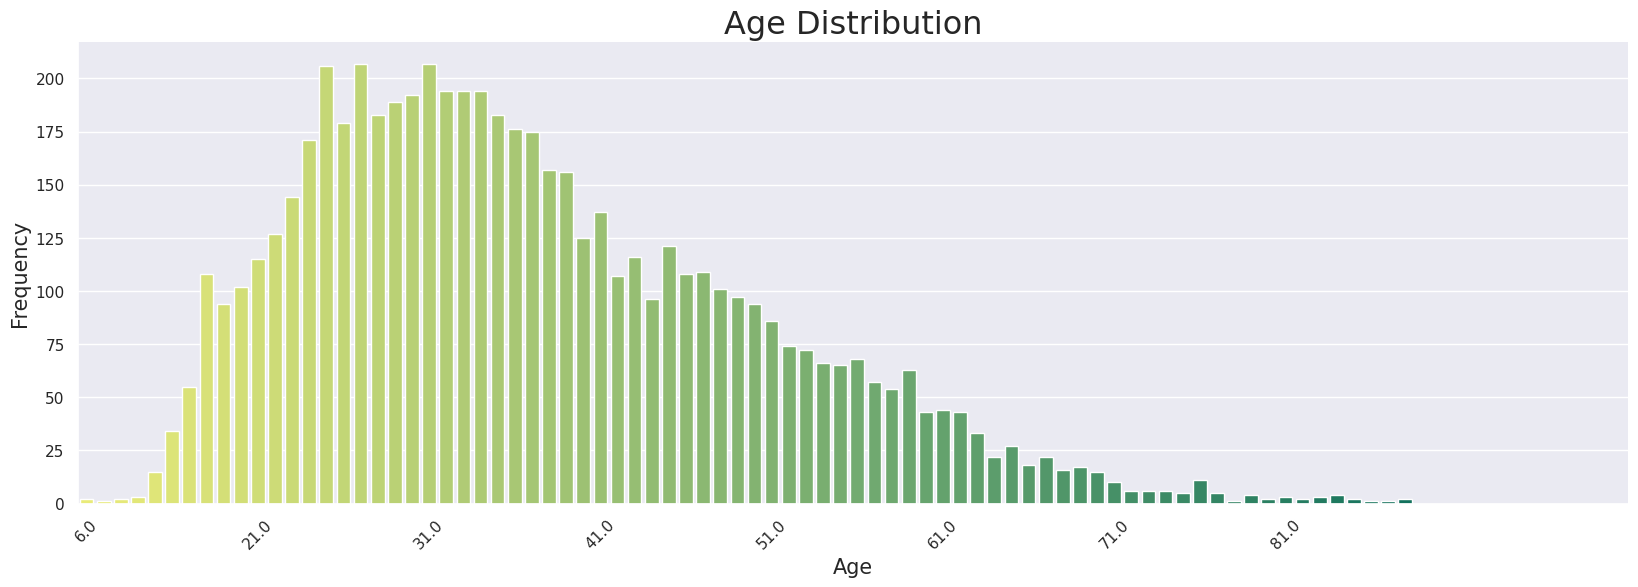

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
sns.barplot(x=df.groupby('age')['id'].count().index, y=df.groupby('age')['id'].count().values, palette='summer_r', ax=ax)
plt.xticks(rotation=45);
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
ax.xaxis.set_ticks(np.arange(0, 100, 10))
ax.set_title('Age Distribution', fontsize=23)
sns.despine()

In [22]:
print(f'Given the right skewness of age distribution the mean {df.age.describe()[1]:.2f} years old, \
is greater than the median {df.age.describe()[5]} years old. That is \nbecause the mean is sensitive to the extreme\
 values. A median of 35.0 years old, and further more third quartile at 45.0, show \nthat in most cases the victim was\
 quite young.')
print(f'Age distribution is bimodal with mode in {list(df.age.mode(dropna=True))[0]} and {df.age.mode(dropna=True)[1]}')

Given the right skewness of age distribution the mean 37.10 years old, is greater than the median 35.0 years old. That is 
because the mean is sensitive to the extreme values. A median of 35.0 years old, and further more third quartile at 45.0, show 
that in most cases the victim was quite young.
Age distribution is bimodal with mode in 27.0 and 31.0


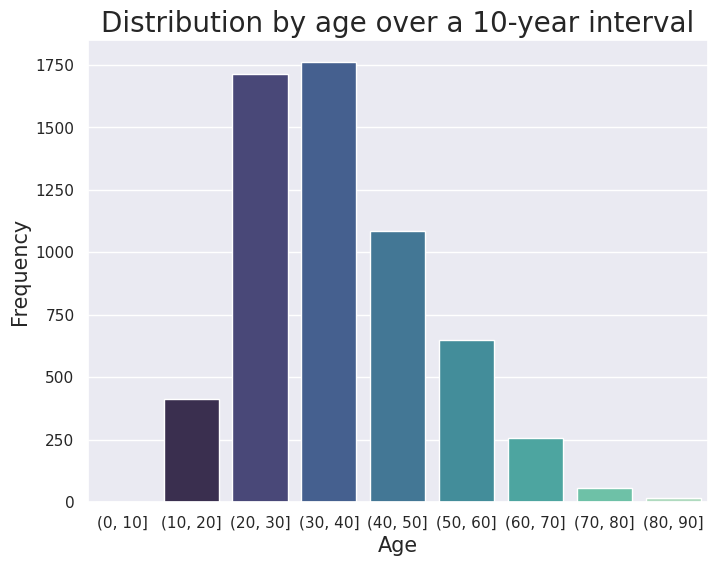

In [23]:
age_range = pd.cut(df.age, range(0, 100, 10)).value_counts().reset_index()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=age_range['index'], y=age_range.values[:, 1], palette='mako', ax=ax)
ax.set_title('Distribution by age over a 10-year interval', fontsize=20);
plt.xlabel('Age', fontsize=15);
plt.ylabel('Frequency', fontsize=15);

Let's now see the age distribution along the races:

* for Asians and Whites, victims aged around 30 were involved in most cases
* for Others and Native Americans, victims of about 28 years were involved in most cases
* for Hispanics and Blacks, victims aged around 25 were involved in most cases

So we can say that for Hispanics and Blacks, younger people have been victims of police shootings.

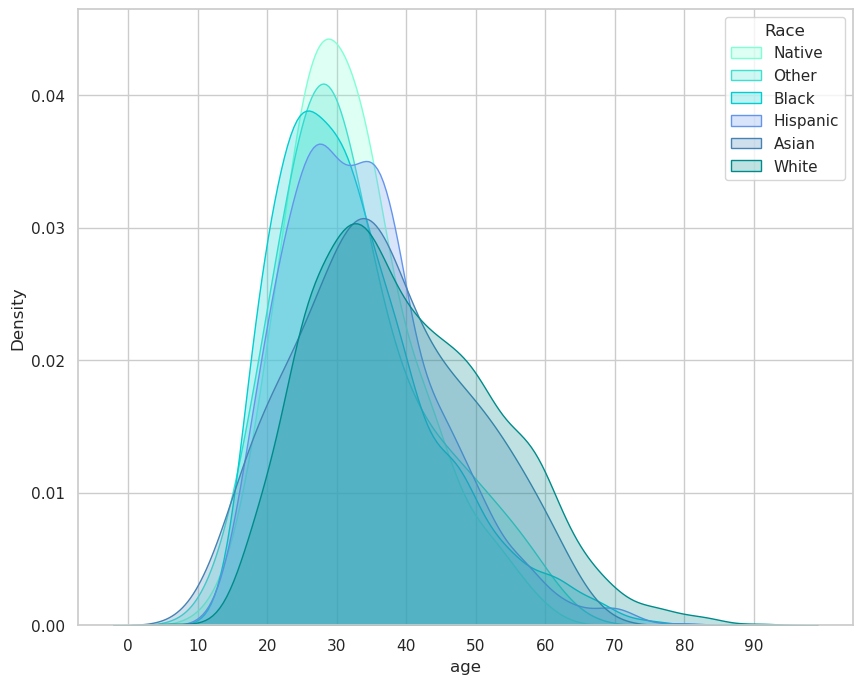

In [24]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
axes.xaxis.set_ticks(np.arange(0, 100, 10))

sns.kdeplot(df[df.race == 'N'].age, ax=axes, shade=True, color='#7FFFD4')
sns.kdeplot(df[df.race == 'O'].age, ax=axes, shade=True, color='#40E0D0')
sns.kdeplot(df[df.race == 'B'].age, ax=axes, shade=True, color='#00CED1')
sns.kdeplot(df[df.race == 'H'].age, ax=axes, shade=True, color='#6495ED')
sns.kdeplot(df[df.race == 'A'].age, ax=axes, shade=True, color='#4682B4')
sns.kdeplot(df[df.race == 'W'].age, ax=axes, shade=True, color='#008B8B')

axes.legend(labels=["Native", "Other", 'Black', 'Hispanic', 'Asian', 'White'], title='Race');

<a id="5.2"></a>
## Dates and week days

By creating the "year" column from the date column, we can look at the cases that have occurred each year and see that there is a growing trend over the years.

In [25]:
# Creating year column
df['year'] = df['date'].dt.year

Number of events happened in year 2015 is 993
Number of events happened in year 2016 is 960
Number of events happened in year 2017 is 986
Number of events happened in year 2018 is 990
Number of events happened in year 2019 is 999
Number of events happened in year 2020 is 1021
Number of events happened in first 4 months of 2021 is 284


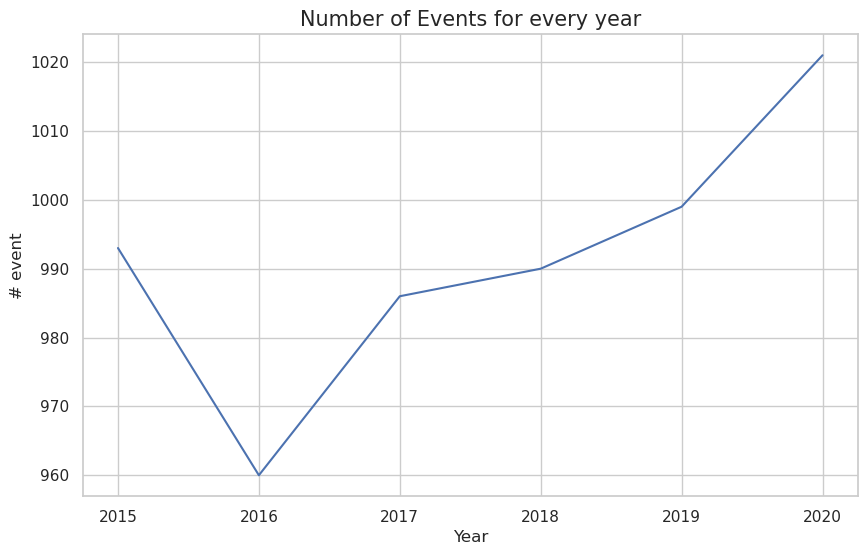

In [26]:
plt.figure(figsize=(10, 6))
y = list()
for i in df.year.unique():
    if i == 2021:
        print("Number of events happened in first 4 months of 2021 is", df.loc[df.year==i,'id'].count())
        y.append(df.loc[df.year==i,'id'].count())
    else:
        print(f"Number of events happened in year {i} is", df.loc[df.year==i,'id'].count())
        y.append(df.loc[df.year==i,'id'].count())
year_event = pd.Series(y, index = np.arange(2015, 2022, 1))
plt.plot(year_event.index[:-1], year_event.values[:-1]);
plt.xlabel('Year')
plt.ylabel('# event')
plt.title('Number of Events for every year', fontsize=15);

Considering a monthly period over these 6 and a quarter years, we can see that in the half of 2015, at the beginning of 2018 and in the first quarter of 2020 we reached some peaks of about more than 100 cases in on month. On a monthly basis, we can't see a clear seasonality of the phenomenon. 

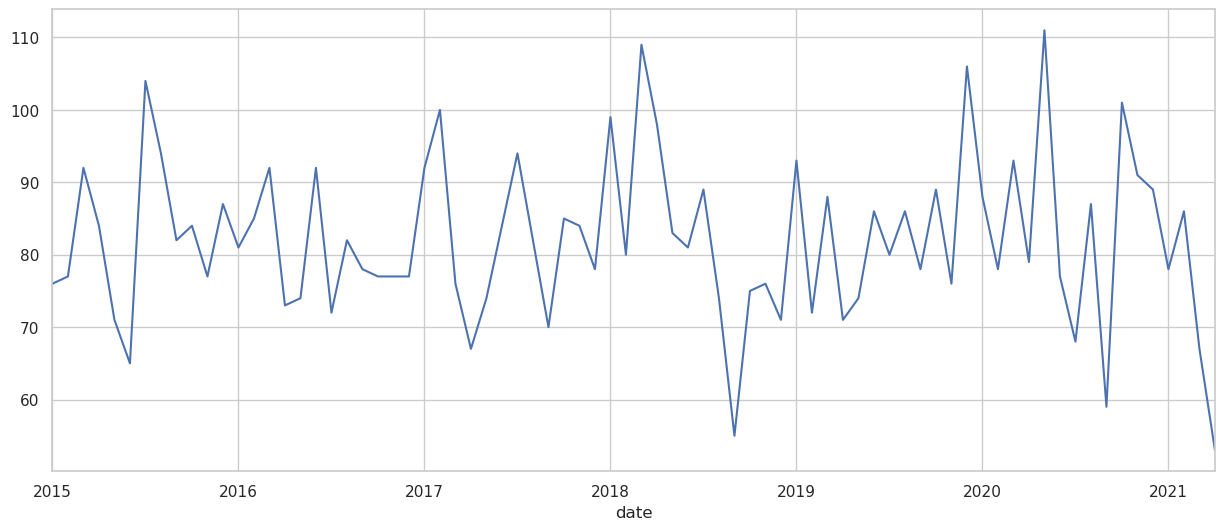

In [27]:
plt.figure(figsize=(15, 6))
df['date'].groupby(df.date.dt.to_period('M')).count().plot(kind='line');

As this plot shows, we don't have evidence that more cases happen during the weekend.

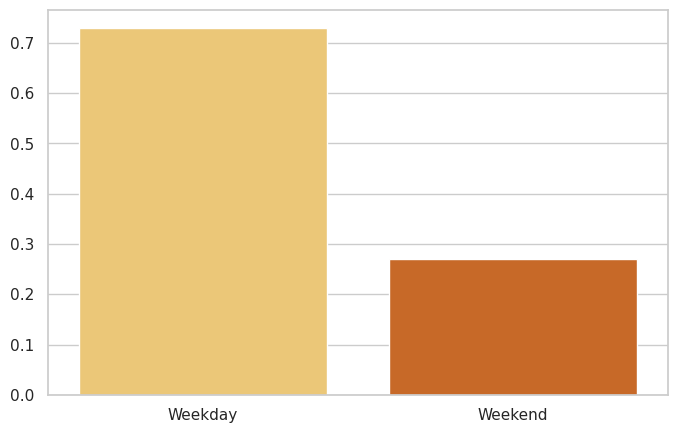

In [28]:
# Transorm the datetime date variable in a categorical variable with two values Weekday and Weekend.
plt.figure(figsize=(8, 5))
count = df['date'].apply(lambda x: 'Weekday' if x.dayofweek < 5 else 'Weekend').value_counts(normalize=True)
sns.barplot(x=count.index, y=count.values, palette='YlOrBr');

Investigating more on days of the week, we can see that the central days of the week have an higher percentage of cases.

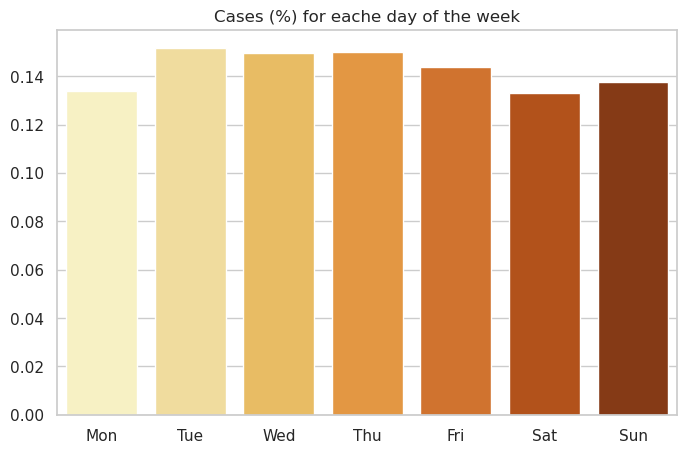

In [29]:
count = df['date'].apply(lambda x: x.dayofweek).value_counts(normalize=True).sort_index()
count.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.barplot(x=count.index, y=count.values, ax=ax, palette='YlOrBr')
ax.set_title('Cases (%) for eache day of the week');

<a id="5.3"></a>
## Victim state and police body camera
Let's go ahead with a brief description of these six countplots:

* we can see that only in 20% of cases victims had signs of mental instability
* in only 10% of cases policeman had the body camera
* in 70% of cases the situation was declared dangerous.
* Manner of death doesn't seem to be an interesting variable beacause most of the cases are "shot"
* Most used arm was gun
* Over 95% of the victims was male

In [30]:
# Calculating the percent of single observations for every the selected columns
count_1 = df['signs_of_mental_illness'].value_counts(normalize=True) 
count_2 = df['threat_level'].value_counts(normalize=True)
count_3 = df['body_camera'].value_counts(normalize=True)
count_4 = df['manner_of_death'].value_counts(normalize=True)
count_5 = df['armed'].value_counts(normalize=True)
count_6 = df['gender'].value_counts(normalize=True)

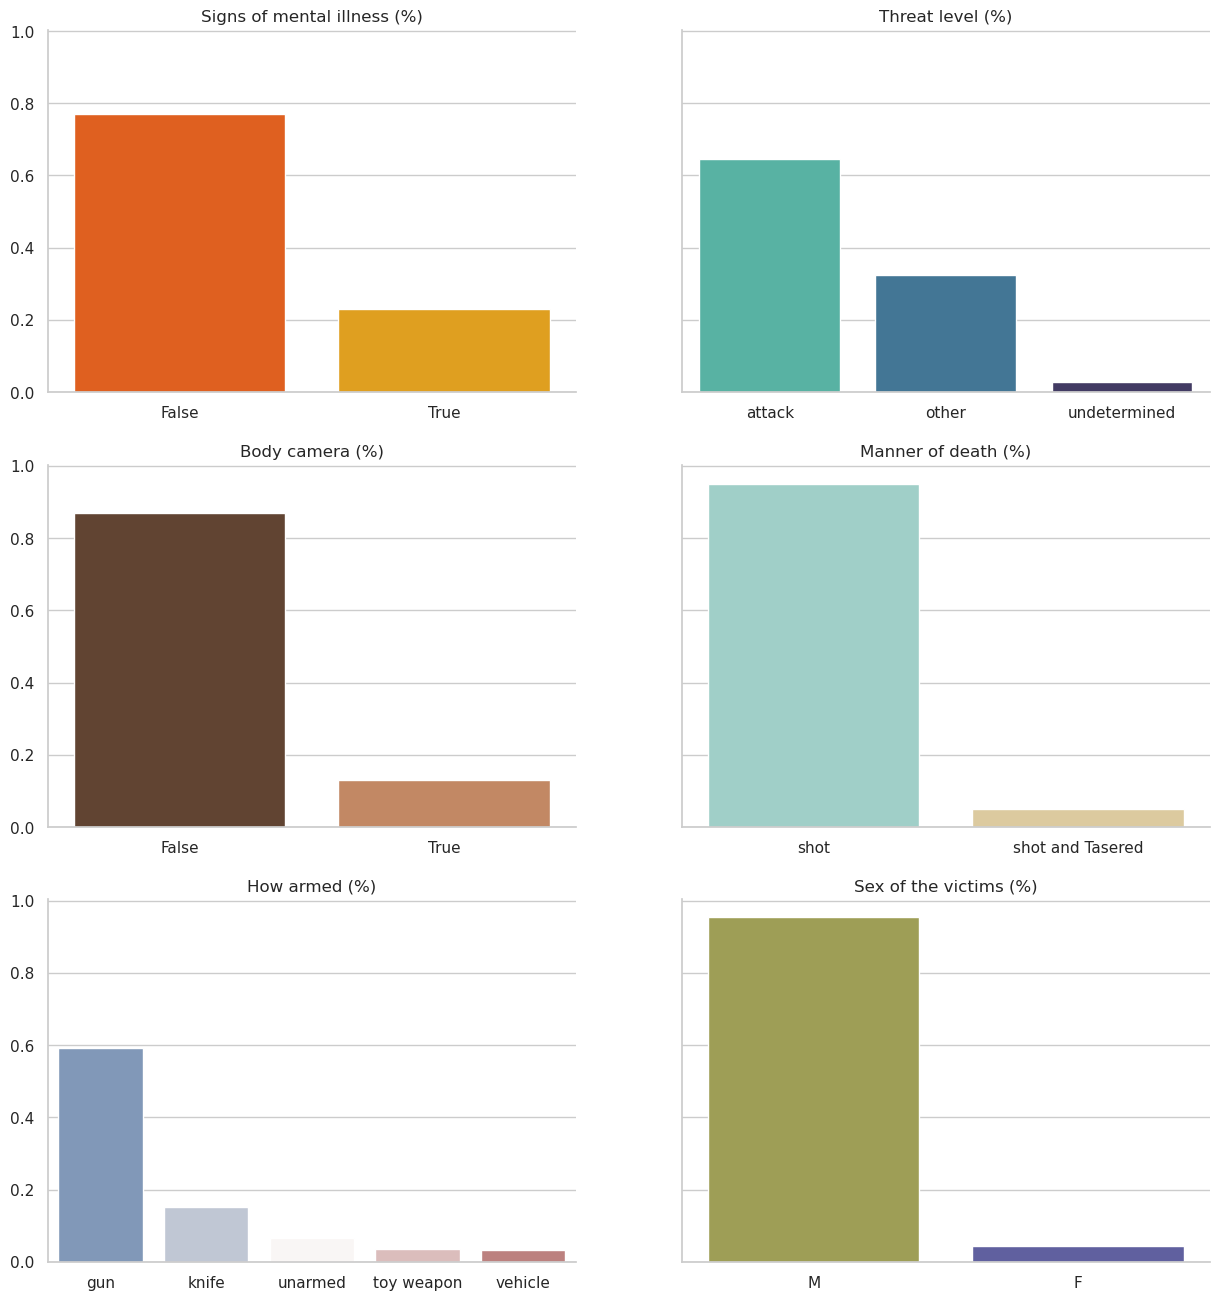

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(15, 16), sharey=True) # 3 row and 2 columns subplots
sns.barplot(x=count_1.index, y=count_1.values, palette='autumn', ax=axes[0, 0])
axes[0, 0].set_title('Signs of mental illness (%)')
sns.barplot(x=count_2.index, y=count_2.values, palette='mako_r', ax=axes[0, 1])
axes[0, 1].set_title('Threat level (%)')
sns.barplot(x=count_3.index, y=count_3.values, palette='copper', ax=axes[1, 0])
axes[1, 0].set_title('Body camera (%)')
sns.barplot(x=count_4.index, y=count_4.values, palette='BrBG_r', ax=axes[1, 1])
axes[1, 1].set_title('Manner of death (%)')
sns.barplot(x=count_5.index[:5], y=count_5.values[:5], palette='vlag', ax=axes[2, 0])
axes[2, 0].set_title('How armed (%)')
sns.barplot(x=count_6.index, y=count_6.values, palette='gist_stern_r', ax=axes[2, 1])
axes[2, 1].set_title('Sex of the victims (%)')

sns.despine()

We can see that in 87.4% of police shoting cases, victimes were armed, in 6.45% of cases they were unarmed and in 3.4% of cases they had a toy weapon.

In [32]:
def armed_or_not(x): # selecting armed, unarmed, toy weapon or undetermined function 
    if x != 'unarmed' and x != 'toy weapon' and x != 'undetermined':
        return 'armed'
    elif x == 'toy weapon':
        return 'toy weapon'
    elif x == 'undetermined':
        return 'undetermined'
    else:
        return 'unarmed'
    
armed_or_not = df.armed.apply(armed_or_not).value_counts(normalize=True) # counting the values on armed column


fig = px.pie(values = armed_or_not.values, names = armed_or_not.index, title='Armed or unarmed (%)',\
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update(layout=dict(title=dict(x=0.47),autosize=True))
fig.show()

Analyzing sex with respect to age and the manner of death, we see that for males the distributions are equivalent between shot and shot and tasered, while for women the shot mode is much more frequent.

In the distribution of the breed with respect to age and mode of death, it can be seen that they are generally similar except for Native Americans where the shot and tasered mode reports a more advanced age

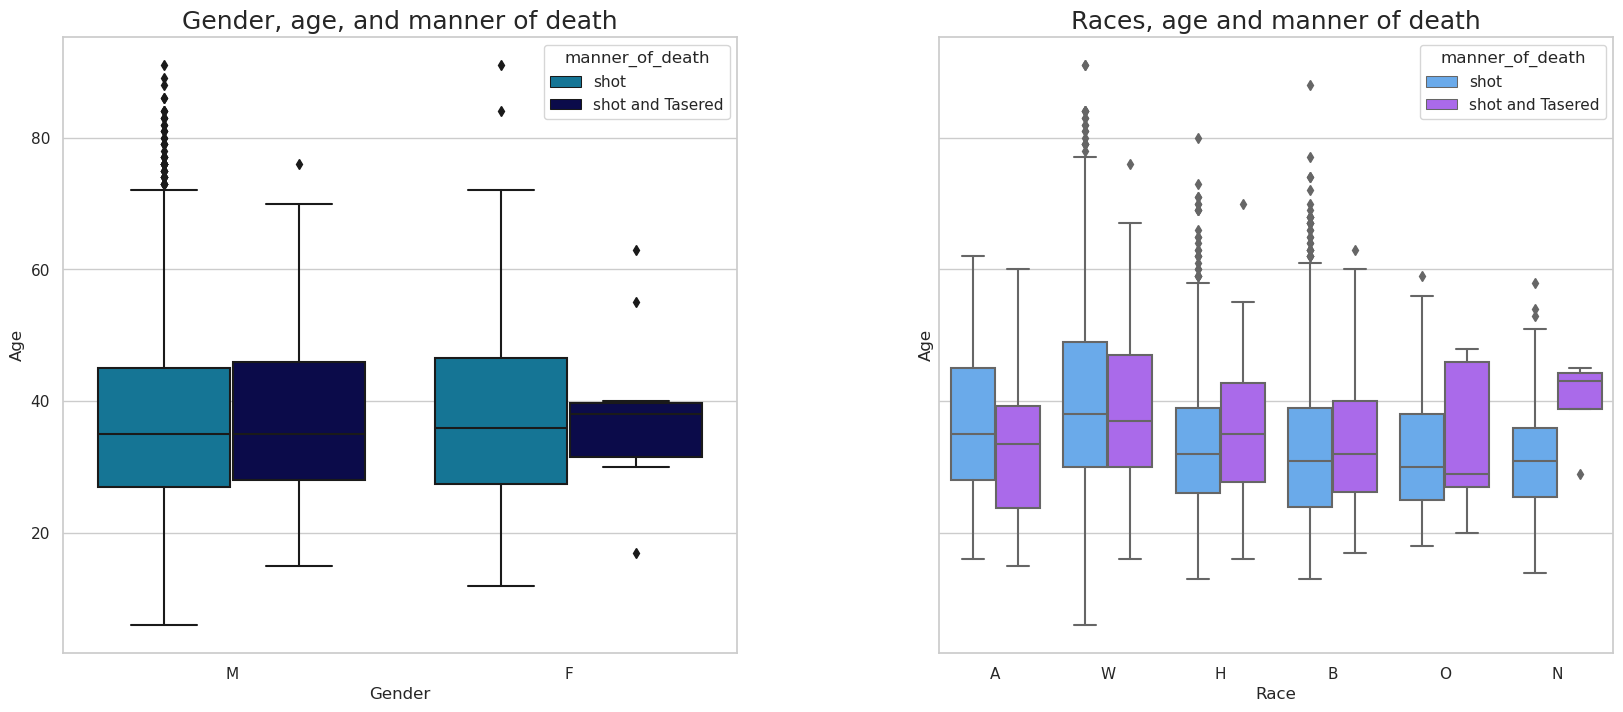

In [33]:
# manner of death
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plt.subplots_adjust(wspace=0.3) # Set the width between subplots.
sns.boxplot(x="gender", y="age", hue='manner_of_death', data=df, palette='ocean_r', ax=axes[0])\
.set(xlabel='Gender', ylabel='Age')
axes[0].set_title('Gender, age, and manner of death', fontsize=18)
sns.boxplot(x="race", y="age", hue='manner_of_death', data=df, palette='cool', ax=axes[1]).set(xlabel='Race', ylabel='Age')
axes[1].set_title('Races, age and manner of death', fontsize=18)
plt.show()

<a id="5.4"></a>
## Weapons and gender
Analyzing in more details the relation among weapons and gender we can see that:

* guns are most used weapons for both categories
* women had relatively more knives as weapons
* women were relatively more unarmed or had toy weapons 

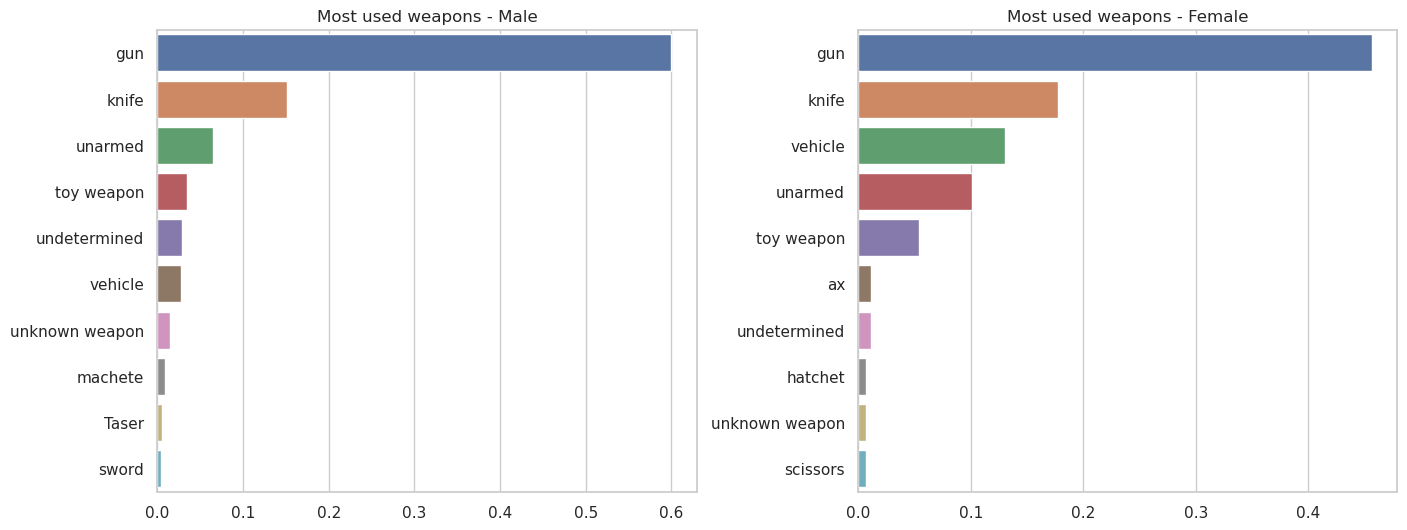

In [34]:
count_7 = df[df.gender == 'M'].armed.value_counts(normalize=True)[:10] # selecting gender as Male and and arm used
count_8 = df[df.gender == 'F'].armed.value_counts(normalize=True)[:10] # selecting gender as Female and and arm used

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.subplots_adjust(wspace=0.3) # Set the width between subplots.
sns.barplot(y=count_7.index, x=count_7.values, ax=axes[0])
axes[0].set_title('Most used weapons - Male')
sns.barplot(y=count_8.index, x=count_8.values, ax=axes[1])
axes[1].set_title('Most used weapons - Female');

<a id="5.5"></a>
## Is USA police racist?
The race column let us know that in many cases of fatal shooting white people are involved, followed by black and hispanic.

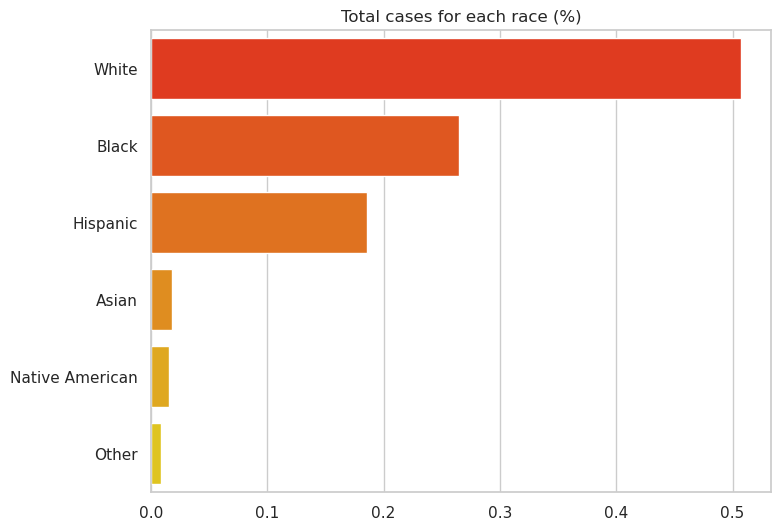

In [35]:
count_rc = df.race.value_counts(normalize=True) # Number of cases per each race
count_rc.index = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other'] # Renaming index of variable count_rc

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(y=count_rc.index, x=count_rc.values, palette='autumn', ax=ax)
ax.set_title('Total cases for each race (%)');

Considering instead the race shares in the USA, we can see that in proportion there is an higher rate of victims from the black USA population.

To get the USA population's share of races we merge the population by city dataframe with the share race by city dataframe, so after making the necessary manipulations on the new dataset we calculate the share of the total population breeds.

In [36]:
share_race_city.head()

Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   
3              AL     Addison town        99.1         0.1   
4              AL       Akron town        13.2        86.5   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3  
3                     0         0.1            0.4  
4                     0           0            0.3

In [37]:
share_race_city.columns = ['state',       # modifying columns name
                           'city',
                           'share_white',
                           'share_black',
                           'share_native_american',
                           'share_asian',
                           'share_hispanic']

share_race_city['city'] = share_race_city['city'].apply(lambda x: x.rsplit(' ', 1)[0])

In [38]:
# Merge the dataframe of the population by city with the dataframe share race by city on the column 'city'
# then dropping unneeded columns and rename column state_x
share_race_and_pop = pd.merge(pop_by_city, share_race_city, how='left', on=['city'])
share_race_and_pop = share_race_and_pop.drop(['state_y', 'lat', 'lng'], axis=1)
share_race_and_pop = share_race_and_pop.rename(columns={'state_x':'state'})
rmv_duplic = share_race_and_pop[['state', 'city']][share_race_and_pop[['state', 'city']].duplicated()].index
share_race_and_pop = share_race_and_pop.drop(rmv_duplic)
share_race_and_pop.head()

city state  population share_white share_black  \
0    Anchor Point    AK        2057        90.2         0.3   
1       Anchorage    AK      253421          66         5.6   
3          Barrow    AK        4178        16.9           1   
4        Big Lake    AK        3136        86.1         0.2   
10  Copper Center    AK         397        45.7           0   

   share_native_american share_asian share_hispanic  
0                    3.8         0.9            2.2  
1                    7.9         8.1            7.6  
3                   61.2         9.1            3.1  
4                      7         0.5            3.1  
10                  48.5         0.3              3

In [39]:
# change dtypes in float 
share_race_and_pop['share_white'] = share_race_and_pop['share_white'].replace({'(X)':np.nan, '-':np.nan})
share_race_and_pop['share_white'] = share_race_and_pop['share_white'].astype(float)
share_race_and_pop['share_black'] = share_race_and_pop['share_black'].replace({'(X)':np.nan, '-':np.nan})
share_race_and_pop['share_black'] = share_race_and_pop['share_black'].astype(float)
share_race_and_pop['share_native_american'] = share_race_and_pop['share_native_american'].\
replace({'(X)':np.nan, '-':np.nan})
share_race_and_pop['share_native_american'] = share_race_and_pop['share_native_american'].astype(float)
share_race_and_pop['share_asian'] = share_race_and_pop['share_asian'].replace({'(X)':np.nan, '-':np.nan})
share_race_and_pop['share_asian'] = share_race_and_pop['share_asian'].astype(float)
share_race_and_pop['share_hispanic'] = share_race_and_pop['share_hispanic'].replace({'(X)':np.nan, '-':np.nan})
share_race_and_pop['share_hispanic'] = share_race_and_pop['share_hispanic'].astype(float)
share_race_and_pop = share_race_and_pop.fillna(method='backfill')

In [40]:
# race rate by city
share_race_and_pop['pop_w'] = share_race_and_pop.population * share_race_and_pop.share_white / 100
share_race_and_pop['pop_b'] = share_race_and_pop.population * share_race_and_pop.share_black / 100
share_race_and_pop['pop_na'] = share_race_and_pop.population * share_race_and_pop.share_native_american / 100
share_race_and_pop['pop_a'] = share_race_and_pop.population * share_race_and_pop.share_asian / 100
share_race_and_pop['pop_h'] = share_race_and_pop.population * share_race_and_pop.share_hispanic / 100
share_race_and_pop.head()

city state  population  share_white  share_black  \
0    Anchor Point    AK        2057       90.200        0.300   
1       Anchorage    AK      253421       66.000        5.600   
3          Barrow    AK        4178       16.900        1.000   
4        Big Lake    AK        3136       86.100        0.200   
10  Copper Center    AK         397       45.700        0.000   

    share_native_american  share_asian  share_hispanic      pop_w     pop_b  \
0                   3.800        0.900           2.200   1855.414     6.171   
1                   7.900        8.100           7.600 167257.860 14191.576   
3                  61.200        9.100           3.100    706.082    41.780   
4                   7.000        0.500           3.100   2700.096     6.272   
10                 48.500        0.300           3.000    181.429     0.000   

      pop_na     pop_a     pop_h  
0     78.166    18.513    45.254  
1  20020.259 20527.101 19259.996  
3   2556.936   380.198   129.518  
4    219.520    15.680    97.216  
10   192.545     1.191    11.910

In [41]:
share_race_and_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2828 entries, 0 to 10079
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   2828 non-null   object 
 1   state                  2828 non-null   object 
 2   population             2828 non-null   int64  
 3   share_white            2828 non-null   float64
 4   share_black            2828 non-null   float64
 5   share_native_american  2828 non-null   float64
 6   share_asian            2828 non-null   float64
 7   share_hispanic         2828 non-null   float64
 8   pop_w                  2828 non-null   float64
 9   pop_b                  2828 non-null   float64
 10  pop_na                 2828 non-null   float64
 11  pop_a                  2828 non-null   float64
 12  pop_h                  2828 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 309.3+ KB


In [42]:
# Race percentage of USA population list 
share_race_us = list()
for x in range(len(share_race_and_pop.columns)):
    if x <= 7:
        continue
    else:
        share_race_us.append(round(share_race_and_pop[share_race_and_pop.columns[x]].\
                                   sum()/share_race_and_pop.population.sum()*100, 3))
share_race_us

[63.539, 18.809, 1.268, 4.941, 18.561]

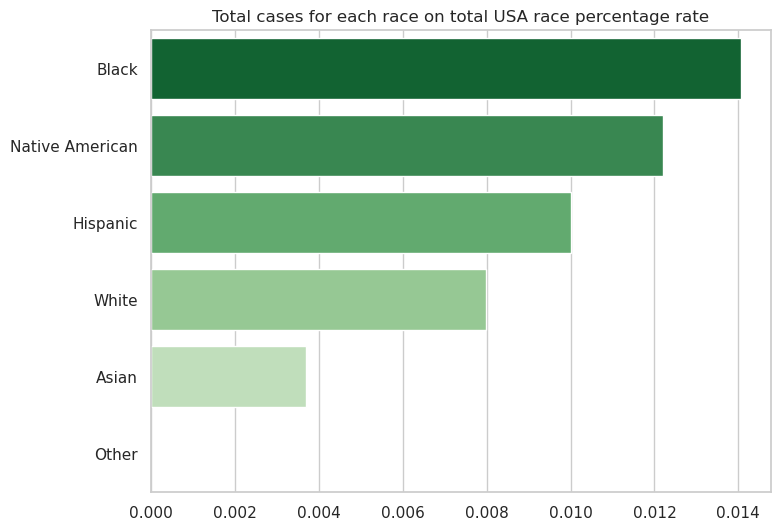

In [43]:
# Distribution graph. The observation 'other' is missing from the plot,
# but it is a residual portion of the distribution and the incidence on the data is negligible
share_race_us_series = pd.Series(share_race_us,
                               index=['White', 'Black', 'Native American', 'Asian', 'Hispanic'])
count_races = count_rc / share_race_us_series
count_races = count_races.sort_values(ascending=False)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=count_races.values, y=count_races.index, palette='Greens_r')
ax.set_title('Total cases for each race on total USA race percentage rate');

As can be seen in relation to the real number of the various races, the black victims are the majority. The data therefore seem to show that interventions against the black race are more brutal than those of other races

<a id="5.6"></a>
## Poverty rate, median income and completed high school rate relationship with police shoting cases
Now let's add poverty rate, completed high school rate and median housold income to a new dataframe

In [44]:
cases = df.groupby(['state', 'city']).count()['id'].reset_index()
cases.columns = ['state', 'city', 'cases']

income['Median Income'] = income['Median Income'].replace({'(X)':np.nan, '-':np.nan})
income = income.fillna(0)
pov_sch = pd.merge(poverty, highschool)
pov_sch = pd.merge(pov_sch, income)
pov_sch.columns = ['state', 'city', 'poverty_rate', 'percent_completed_hs', 'median_income']
pov_sch['city'] = pov_sch['city'].apply(lambda x: x.rsplit(' ', 1)[0])
rmv_indx = pov_sch[['state', 'city']][pov_sch[['state', 'city']].duplicated()].index
pov_sch = pov_sch.drop(rmv_indx)
pov_sch = pd.merge(cases, pov_sch, on=['state', 'city'], how='left')
pov_sch['poverty_rate'] = pov_sch['poverty_rate'].astype(float)
pov_sch['percent_completed_hs'] = pov_sch['percent_completed_hs'].astype(float)
pov_sch['median_income'] = pov_sch['median_income'].astype(float)
pov_sch.head()

state           city  cases  poverty_rate  percent_completed_hs  \
0    AK   Anchor Point      1        10.100                93.800   
1    AK      Anchorage     11         8.200                93.000   
2    AK         Barrow      1        11.700                84.600   
3    AK       Big Lake      1         9.600                90.400   
4    AK  Copper Center      1        18.800                84.800   

   median_income  
0      51591.000  
1      78326.000  
2      76902.000  
3      70988.000  
4      39063.000

We now merge the dataset with geographical, demographical info and the rate of cases on the total population by city, so we can see the relationship between poverty rate, completed high school rate, median income and the rate of police shooting cases on the total population.

In [45]:
total = pd.merge(pov_sch, pop_by_city, on=['state', 'city'], how='left')
total.head()

state           city  cases  poverty_rate  percent_completed_hs  \
0    AK   Anchor Point      1        10.100                93.800   
1    AK      Anchorage     11         8.200                93.000   
2    AK         Barrow      1        11.700                84.600   
3    AK       Big Lake      1         9.600                90.400   
4    AK  Copper Center      1        18.800                84.800   

   median_income  population    lat      lng  
0      51591.000    2057.000 59.770 -151.705  
1      78326.000  253421.000 61.151 -149.109  
2      76902.000    4178.000    NaN      NaN  
3      70988.000    3136.000 61.526 -149.972  
4      39063.000     397.000 61.984 -145.354

In [46]:
total['cases_on_pop_rate'] = (total['cases'] / total['population'])*100
total.head()

state           city  cases  poverty_rate  percent_completed_hs  \
0    AK   Anchor Point      1        10.100                93.800   
1    AK      Anchorage     11         8.200                93.000   
2    AK         Barrow      1        11.700                84.600   
3    AK       Big Lake      1         9.600                90.400   
4    AK  Copper Center      1        18.800                84.800   

   median_income  population    lat      lng  cases_on_pop_rate  
0      51591.000    2057.000 59.770 -151.705              0.049  
1      78326.000  253421.000 61.151 -149.109              0.004  
2      76902.000    4178.000    NaN      NaN              0.024  
3      70988.000    3136.000 61.526 -149.972              0.032  
4      39063.000     397.000 61.984 -145.354              0.252

All the number are expressed in percentage, so 0.2 means 0.2%.

* poverty rate: cities with more cases don't seem to have an high poverty rate, as the average poverty rate for USA is around 20%
* percent completed highschool: we can see that the points are more concentrated in values higher than 80%
* median income: considering the median income by city, we can see that points are more concentrated between 25k and 50k 

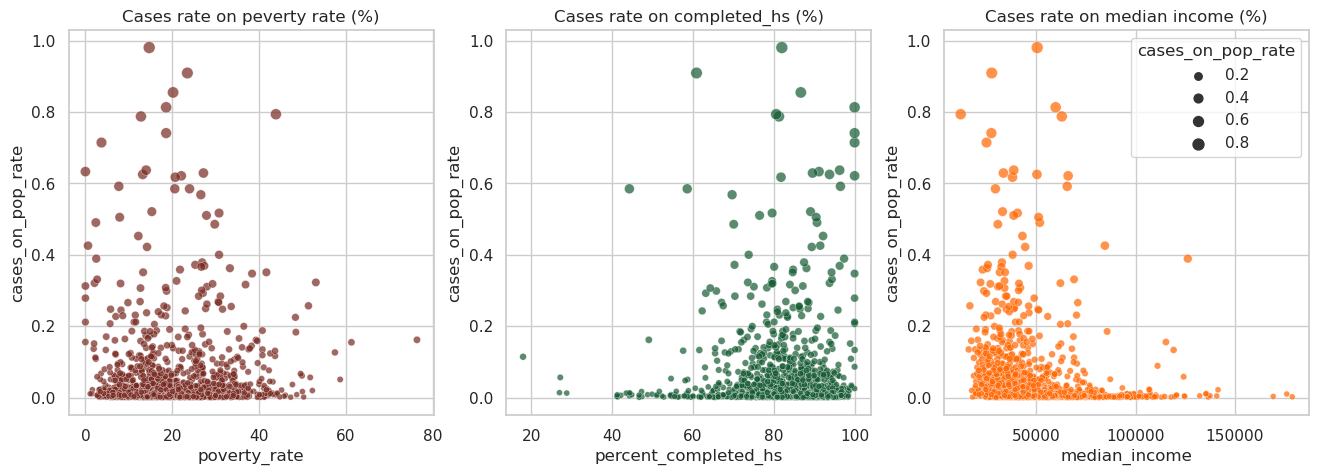

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.scatterplot(y='cases_on_pop_rate', x='poverty_rate', data=total[total.population > 100], ax=axes[0], color\
               ='#78281F', size='cases_on_pop_rate', legend=False, alpha=0.7, linewidth=0.3)
sns.scatterplot(y='cases_on_pop_rate', x='percent_completed_hs', data=total[total.population > 100], ax=axes[1],\
               color='#145A32', size='cases_on_pop_rate', legend=False, alpha=0.7, linewidth=0.3)
sns.scatterplot(y='cases_on_pop_rate', x='median_income', data=\
                total[(total.population > 100) & (total.median_income > 0)], ax=axes[2], color='#FF6600', \
               size='cases_on_pop_rate', alpha=0.7, linewidth=0.3)
axes[0].set_title('Cases rate on peverty rate (%)')
axes[1].set_title('Cases rate on completed_hs (%)')
axes[2].set_title('Cases rate on median income (%)');

From the above plots these small cities were excluded, for each we have one cases and a really small population.

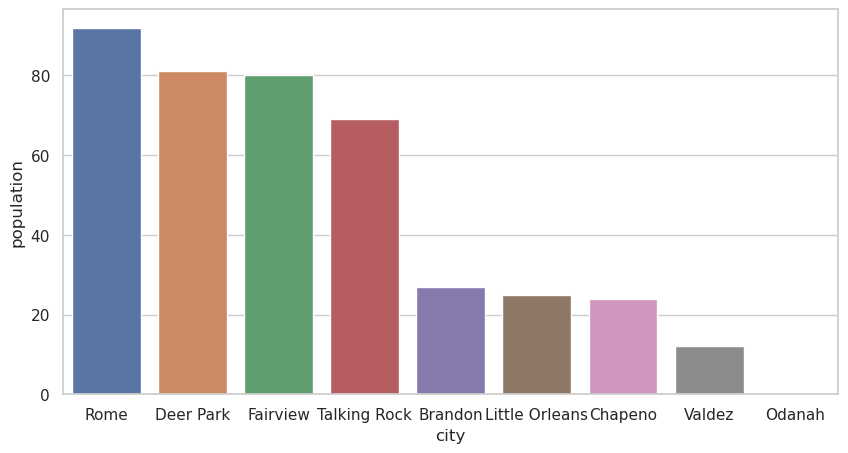

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x=total[total.population <= 100].sort_values(['population'], ascending=False).city,\
            y=total[total.population <= 100].sort_values(['population'], ascending=False).population, ax=axes);

Now we make a copy of the share_race_city dataframe and from it obtain an average race rate of the population of USA states.

In [49]:
share_race_df = share_race_city.copy()
for x, y in enumerate(share_race_df.columns): # replacing X and - with numpy nan
    if x < 2:
        continue
    else:
        share_race_df[y] = share_race_df[y].replace({'(X)':np.nan, '-':np.nan})
        share_race_df[y] = share_race_df[y].astype(float)

share_race_df.columns = ['state', 'city', 'share_white', 'share_black', 'share_native_american', 'share_asian', \
                         'share_hispanic']
share_race_pop = pd.merge(share_race_df, pop_by_city, on=['state', 'city'], how='left') #merging dataframe
share_race_pop = share_race_pop[['state', 'city', 'population', 'share_white', 'share_black', 'share_native_american',\
                                'share_asian', 'share_hispanic']]

rmv_dup = share_race_pop[['state', 'city']][share_race_pop[['state', 'city']].duplicated()].index #removing duplicate
share_race_pop = share_race_pop.drop(rmv_dup)
share_race_pop.head()

state        city  population  share_white  share_black  \
0    AL      Abanda         NaN       67.200       30.200   
1    AL   Abbeville    2567.000       54.400       41.400   
2    AL  Adamsville         NaN       52.300       44.900   
3    AL     Addison         NaN       99.100        0.100   
4    AL       Akron         NaN       13.200       86.500   

   share_native_american  share_asian  share_hispanic  
0                  0.000        0.000           1.600  
1                  0.100        1.000           3.100  
2                  0.500        0.300           2.300  
3                  0.000        0.100           0.400  
4                  0.000        0.000           0.300

In [50]:
# Creating columns with partial total population by race
share_race_pop['total_white'] = share_race_pop['population'] * (share_race_pop['share_white']/100)
share_race_pop['total_black'] = share_race_pop['population'] * (share_race_pop['share_black']/100)
share_race_pop['total_native_american'] = share_race_pop['population'] * (share_race_pop['share_native_american']/100)
share_race_pop['total_asian'] = share_race_pop['population'] * (share_race_pop['share_asian']/100)
share_race_pop['total_hispanic'] = share_race_pop['population'] * (share_race_pop['share_hispanic']/100)
share_race_pop = share_race_pop.rename(columns={'population':'total_population'})
share_race_pop.head()

state        city  total_population  share_white  share_black  \
0    AL      Abanda               NaN       67.200       30.200   
1    AL   Abbeville          2567.000       54.400       41.400   
2    AL  Adamsville               NaN       52.300       44.900   
3    AL     Addison               NaN       99.100        0.100   
4    AL       Akron               NaN       13.200       86.500   

   share_native_american  share_asian  share_hispanic  total_white  \
0                  0.000        0.000           1.600          NaN   
1                  0.100        1.000           3.100     1396.448   
2                  0.500        0.300           2.300          NaN   
3                  0.000        0.100           0.400          NaN   
4                  0.000        0.000           0.300          NaN   

   total_black  total_native_american  total_asian  total_hispanic  
0          NaN                    NaN          NaN             NaN  
1     1062.738                  2.567       25.670          79.577  
2          NaN                    NaN          NaN             NaN  
3          NaN                    NaN          NaN             NaN  
4          NaN                    NaN          NaN             NaN

In [51]:
# rearangin columns order
share_race_pop = share_race_pop[['state',
                                 'city',
                                 'total_population',
                                 'total_white',
                                 'share_white',
                                 'total_black',
                                 'share_black',
                                 'total_native_american',
                                 'share_native_american',
                                 'total_asian',
                                 'share_asian',
                                 'total_hispanic',
                                 'share_hispanic']]
share_race_pop.head()

state        city  total_population  total_white  share_white  total_black  \
0    AL      Abanda               NaN          NaN       67.200          NaN   
1    AL   Abbeville          2567.000     1396.448       54.400     1062.738   
2    AL  Adamsville               NaN          NaN       52.300          NaN   
3    AL     Addison               NaN          NaN       99.100          NaN   
4    AL       Akron               NaN          NaN       13.200          NaN   

   share_black  total_native_american  share_native_american  total_asian  \
0       30.200                    NaN                  0.000          NaN   
1       41.400                  2.567                  0.100       25.670   
2       44.900                    NaN                  0.500          NaN   
3        0.100                    NaN                  0.000          NaN   
4       86.500                    NaN                  0.000          NaN   

   share_asian  total_hispanic  share_hispanic  
0        0.000             NaN           1.600  
1        1.000          79.577           3.100  
2        0.300             NaN           2.300  
3        0.100             NaN           0.400  
4        0.000             NaN           0.300

In [52]:
# Grouping by state to get the shared total population of each state 
share_race_pop = share_race_pop.groupby('state').sum()
share_race_pop['share_white'] = round((share_race_pop['total_white'] / share_race_pop['total_population'] * 100), 2)
share_race_pop['share_black'] = round((share_race_pop['total_black'] / share_race_pop['total_population'] * 100), 2)
share_race_pop['share_native_american'] = round((share_race_pop['total_native_american']\
                                                 / share_race_pop['total_population'] * 100), 2)
share_race_pop['share_asian'] = round((share_race_pop['total_asian'] / share_race_pop['total_population'] * 100), 2)
share_race_pop['share_hispanic'] = round((share_race_pop['total_hispanic'] / share_race_pop['total_population'] * 100), 2)

share_race_pop.head()

total_population  total_white  share_white  total_black  share_black  \
state                                                                         
AK           353942.000   235891.160       66.650    20555.124        5.810   
AL          2695464.000  1291733.723       47.920  1251646.585       46.440   
AR          1570573.000  1031075.424       65.650   366894.512       23.360   
AZ          8213301.000  5759555.993       70.120   447294.253        5.450   
CA         48925854.000 26066468.680       53.280  3697067.645        7.560   

       total_native_american  share_native_american  total_asian  share_asian  \
state                                                                           
AK                 32071.437                  9.060    23734.823        6.710   
AL                  8836.199                  0.330    45145.889        1.670   
AR                 12246.550                  0.780    41227.878        2.630   
AZ                197614.928                  2.410   265629.720        3.230   
CA                418267.732                  0.850  7153856.025       14.620   

       total_hispanic  share_hispanic  
state                                  
AK          26469.277           7.480  
AL         109125.428           4.050  
AR         136962.398           8.720  
AZ        2880296.073          35.070  
CA       19377854.588          39.610

In [53]:
df['race'] = df['race'].fillna('U') # Filling nan value with U for undetermined
num_cases_race_sate = pd.get_dummies(df.race) # Creating a new dataframe with the column of cases for each breed
num_cases_race_sate['state'] = df.state # State column
num_cases_race_sate = num_cases_race_sate.groupby('state').sum().reset_index() # Aggregating by state
num_cases_race_sate.columns = ['state', 'asian', 'black', 'hispanic', 'native_american', 'other', 'unknown', 'white']
num_cases_race_sate.head()

state  asian  black  hispanic  native_american  other  unknown  white
0    AK      2      3         0                9      0        3     27
1    AL      0     34         2                0      0       10     70
2    AR      1     26         0                0      0        9     54
3    AZ      0     22        98               13      0       41    117
4    CA     34    151       365                4      8      109    255

In [54]:
# Let's create the new dataframe in which we calculate the percentage of cases by race
total = pd.merge(share_race_pop, num_cases_race_sate, on=['state'])
total['white_cases_rate'] = total['white'] / total['total_white'] * 100
total['black_cases_rate'] = total['black'] / total['total_black'] * 100
total['asian_cases_rate'] = total['asian'] / total['total_asian'] * 100
total['native_american_cases_rate'] = total['native_american'] / total['total_native_american'] * 100
total['hispanic_cases_rate'] = total['hispanic'] / total['total_hispanic'] * 100

total.head()

state  total_population  total_white  share_white  total_black  share_black  \
0    AK        353942.000   235891.160       66.650    20555.124        5.810   
1    AL       2695464.000  1291733.723       47.920  1251646.585       46.440   
2    AR       1570573.000  1031075.424       65.650   366894.512       23.360   
3    AZ       8213301.000  5759555.993       70.120   447294.253        5.450   
4    CA      48925854.000 26066468.680       53.280  3697067.645        7.560   

   total_native_american  share_native_american  total_asian  share_asian  \
0              32071.437                  9.060    23734.823        6.710   
1               8836.199                  0.330    45145.889        1.670   
2              12246.550                  0.780    41227.878        2.630   
3             197614.928                  2.410   265629.720        3.230   
4             418267.732                  0.850  7153856.025       14.620   

   total_hispanic  share_hispanic  asian  black  hispanic  native_american  \
0       26469.277           7.480      2      3         0                9   
1      109125.428           4.050      0     34         2                0   
2      136962.398           8.720      1     26         0                0   
3     2880296.073          35.070      0     22        98               13   
4    19377854.588          39.610     34    151       365                4   

   other  unknown  white  white_cases_rate  black_cases_rate  \
0      0        3     27             0.011             0.015   
1      0       10     70             0.005             0.003   
2      0        9     54             0.005             0.007   
3      0       41    117             0.002             0.005   
4      8      109    255             0.001             0.004   

   asian_cases_rate  native_american_cases_rate  hispanic_cases_rate  
0             0.008                       0.028                0.000  
1             0.000                       0.000                0.002  
2             0.002                       0.000                0.000  
3             0.000                       0.007                0.003  
4             0.000                       0.001                0.002

This plot show us for each state, the number of cases of each race on the total population of that race.

We can see that black population has the highest rate of cases in almost all countries, the higher rate are:

* Idaho has the highest black cases on black population rate
* Hawaii has the highest white cases on white population rate
* Main has the highest hispanic cases on hispanic population rate
* South Dakota has the highest both for native american cases on native american population rate, and asian cases on asian population rate

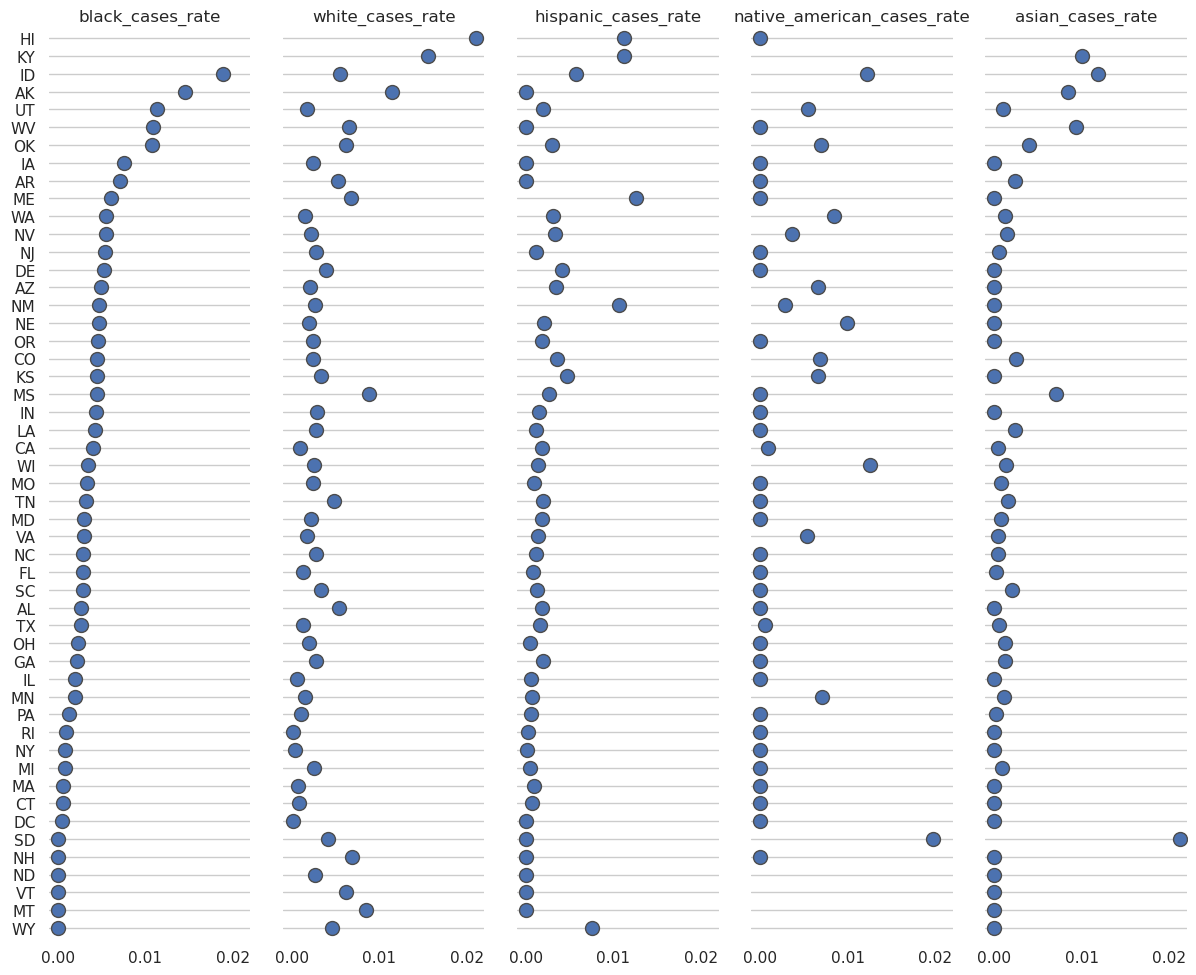

In [55]:
g = sns.PairGrid(total.sort_values('black_cases_rate', ascending=False),
                 x_vars=['black_cases_rate', 'white_cases_rate', 'hispanic_cases_rate', 'native_american_cases_rate',\
                         'asian_cases_rate'],
                 y_vars=['state'],
                 height=10, aspect=.25)
g.map(sns.stripplot, size=10, orient='h', linewidth=1)
g.set(xlim=(-0.001, 0.022), xlabel='', ylabel='')

titles = ['black_cases_rate', 'white_cases_rate', 'hispanic_cases_rate', 'native_american_cases_rate', 'asian_cases_rate']

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)


<a id="5.7"></a>
## States and cities with more fatal police shoting cases
Let's go ahead with some geographical plots to better visualize the fatal police shooting cases.

The graph below shows the number of violent events by state. In absolute terms the largest number of cases occurred in California with over 800 cases, followed Texas with 500 and Florida with 400 cases.

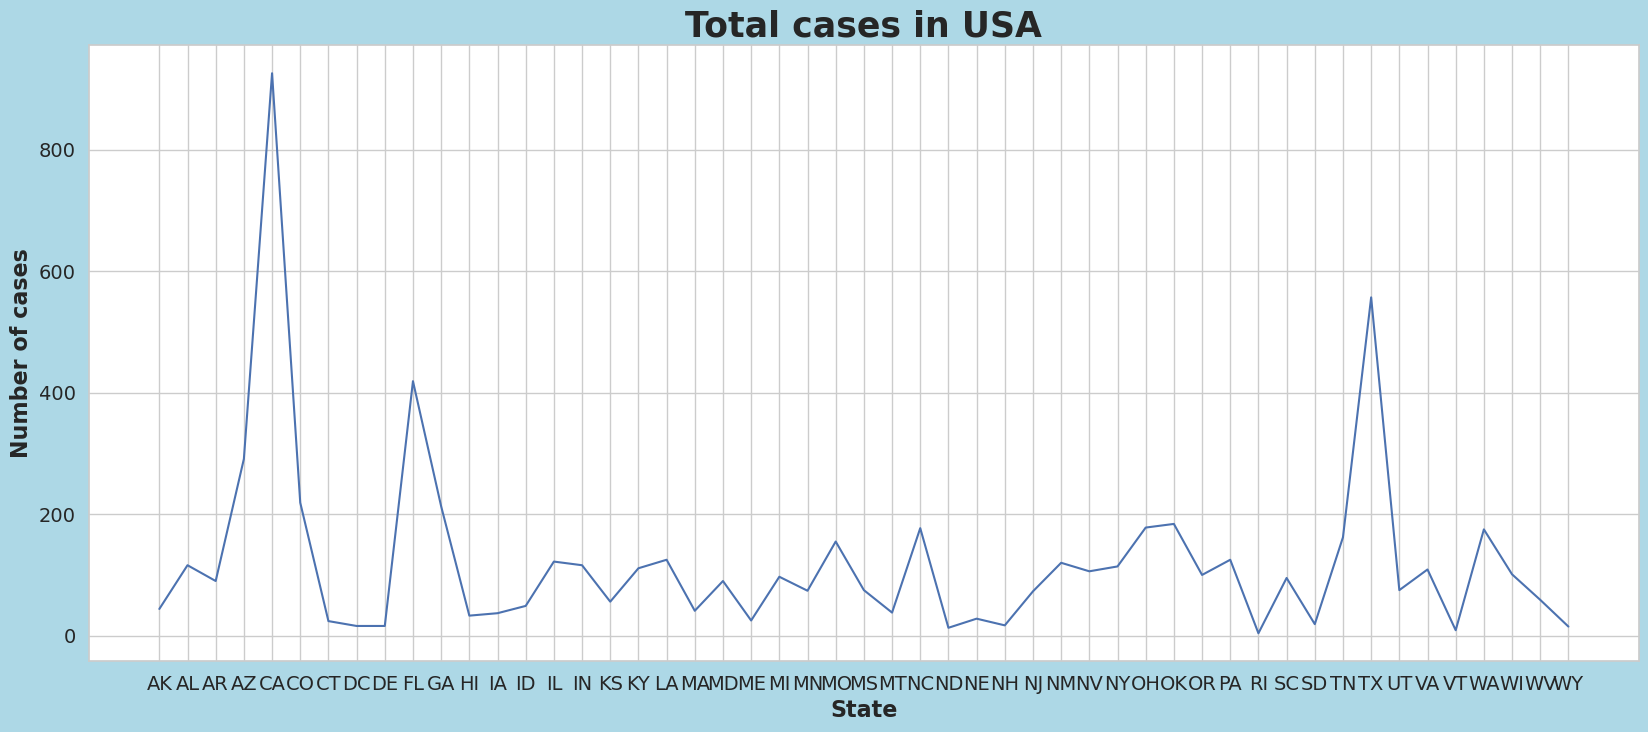

In [56]:
plt.figure(figsize=(20, 8), facecolor='lightblue')
plt.plot(df.groupby('state')['id'].count())
plt.title('Total cases in USA', fontsize=25, fontweight='bold')
plt.ylabel('Number of cases', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

In [57]:
states_cases = pd.DataFrame({'state': df.state.value_counts().index,
                             'cases': list(df.state.value_counts())})

fig = px.choropleth(states_cases, locations='state', locationmode='USA-states',
                    color='cases', range_color=(states_cases.cases.min(), states_cases.cases.max()), scope='usa',
                   color_continuous_scale='reds', title='antani')
fig.update_layout(title='Total cases in USA', title_x=0.5)

But is California the state in which USA Police is more violent?


Below is the population distribution with respect to the various states, note that california is by far the largest state, therefore we see in relation to the number of the population the percentage of attacks per state.

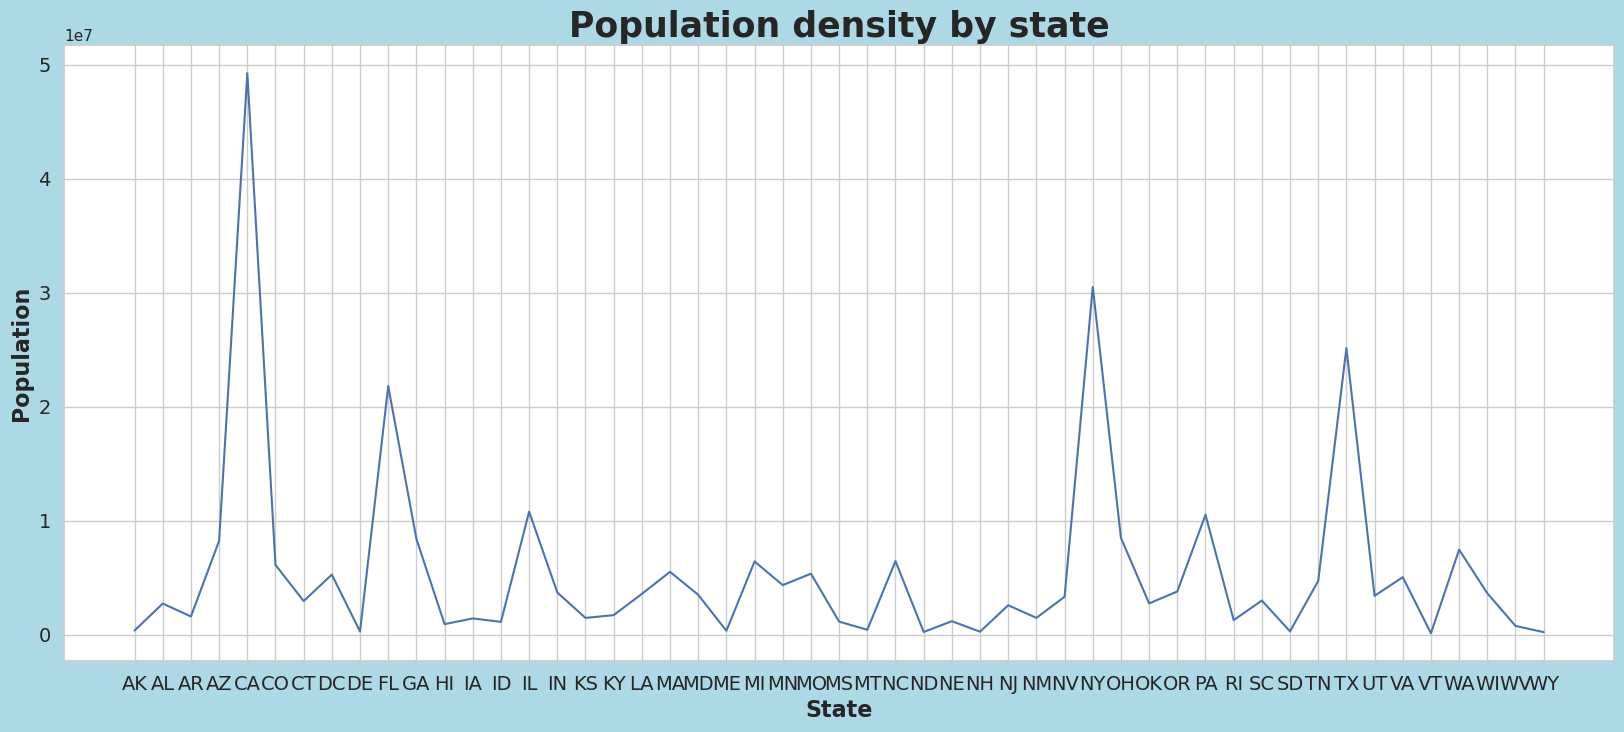

In [58]:
plt.figure(figsize=(20, 8), facecolor='lightblue')
plt.plot(pop_by_city.groupby('state')['population'].sum())
plt.title('Population density by state', fontsize=25, fontweight='bold')
plt.ylabel('Population', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

In [59]:
pop_by_state = pop_by_city.groupby('state')['population'].sum().reset_index()
pop_by_state['pop_ratio'] = round(pop_by_state.population / pop_by_state.population.sum(), 4) * 100
pop_by_state['cases'] = df.groupby('state')['id'].count().reset_index()['id']
pop_by_state['cases_ratio'] = (pop_by_state['cases'] / pop_by_state['population']) * 100
pop_by_state = pop_by_state.sort_values('cases_ratio', ascending=False)
pop_by_state.head()

state  population  pop_ratio  cases  cases_ratio
0     AK      387478      0.140     44        0.011
26    MT      449445      0.160     38        0.008
32    NM     1493940      0.520    120        0.008
49    WV      790762      0.280     59        0.007
21    ME      358554      0.130     25        0.007

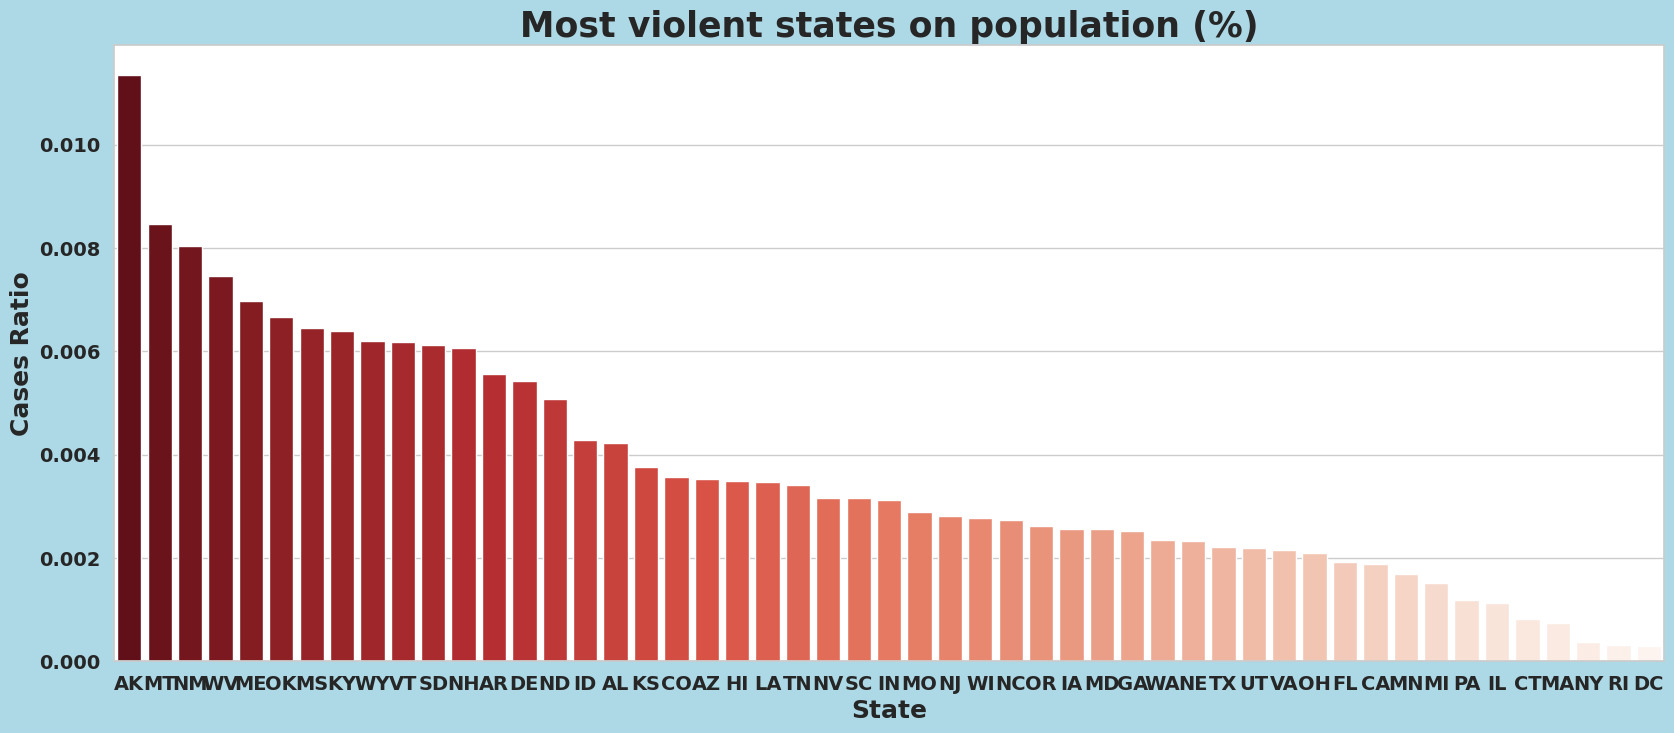

In [60]:
plt.figure(figsize=(20, 8), facecolor='lightblue')
sns.barplot(x=pop_by_state['state'], y=pop_by_state['cases_ratio'], palette='Reds_r')
plt.title('Most violent states on population (%)', fontsize=25, fontweight='bold')
plt.ylabel('Cases Ratio', fontsize=18, fontweight='bold')
plt.xlabel('State', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold');
plt.yticks(fontsize=14, fontweight='bold');

In [61]:
pop_cases_ratio = pop_by_state[['state', 'cases_ratio']]
fig = px.choropleth(pop_cases_ratio, locations='state', locationmode='USA-states', color='cases_ratio',
                   range_color=(pop_cases_ratio.cases_ratio.min(), pop_cases_ratio.cases_ratio.max()),
                   scope='usa',
                   color_continuous_scale='reds',
                   title = 'Most violent states on population (%)')
fig.update_layout(title_x=0.5)

We see from the chart above that in relation to its population, the state appears to be the most violent are Alaska followed by Montana and New Mexico. The California than in absolute terms has the largest number of cases appears to be one of the least affected in term relative.

### Analysis of the states with higher non white victims

We create a rate made dividing all the cases in which non white people were involved by the total non white population of the state to see which state has the higher victims among non white population   

Highest rate is detected in North Dakota, Kentucky, Montana and Alaska.



In [62]:
total['non_white_cases'] = total.asian + total.black + total.hispanic + total.native_american
total['non_white_population'] = total.total_black + total.total_hispanic + total.total_asian + total.total_native_american
total['non_white_cases_rate'] = total.non_white_cases / total.non_white_population
states_rates = total[['state','non_white_cases_rate']]

fig = px.choropleth(states_rates, locations='state', locationmode='USA-states', color='non_white_cases_rate',
                           range_color=(states_rates.non_white_cases_rate.min(),states_rates.non_white_cases_rate.max()),
                           scope="usa",
                           color_continuous_scale='reds',
                           title = 'Non-white cases on total population rate (%)'
                          )
fig.update_layout(title_x = 0.5)

On the other hand, considering the cases involving exclusively the black population, the most violent states are Idaho, Hawii, Kentucky and Alaska.

In [63]:
state_rate = pd.DataFrame({'state': total.state,'black_cases_rate': list(total.black_cases_rate)})

fig = px.choropleth(state_rate, locations='state', locationmode='USA-states', color='black_cases_rate',
                           range_color=(state_rate.black_cases_rate.min(),state_rate.nlargest(2, 'black_cases_rate')\
                                        .values[1][1]),
                           scope="usa",color_continuous_scale='reds', title='Black cases on black population rate (%)')

fig.update_layout(title_x = 0.5)
fig.show()

### Which city is more violent?

Let's now analyze the data at the city level. As reported by the histogram below, in absolute terms, the most violent cities are Los Angeles, Phoenix, Houston, San Antonio and Las Vegas.

In [64]:
cases_by_city = pop_by_city[['city', 'state', 'population']]
cases_by_city.shape

(2832, 3)

In [65]:
cases_lst = []
for x in cases_by_city.city:
    cases_lst.append(df.loc[df['city']==x]['id'].count())
cases_by_city['cases'] = cases_lst

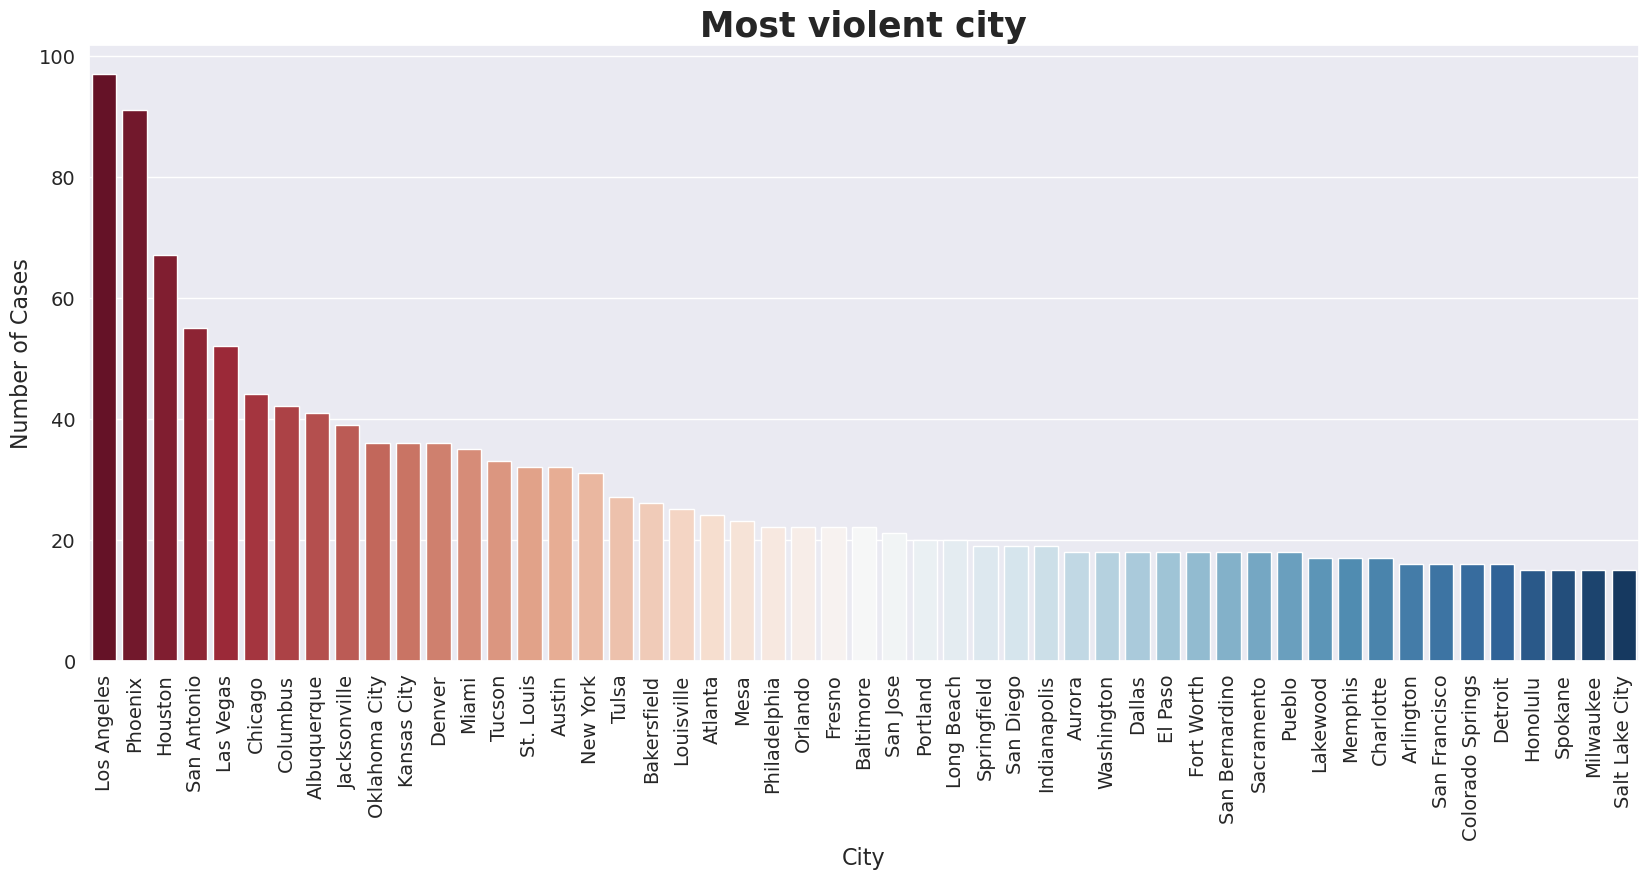

In [66]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.0)
sns.barplot(x=cases_by_city.sort_values('cases', ascending=False)['city'][:80],
            y=cases_by_city.sort_values('cases', ascending=False)['cases'][:80], palette='RdBu')
plt.xticks(rotation=90);
plt.title('Most violent city', fontsize=25, fontweight='bold');
plt.ylabel('Number of Cases', fontsize=16);
plt.xlabel('City', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);


We proced now to visualize all the cases by city in the USA map, analyzing which zone is riskier. Using data manipulation, I built a dataframe with latitude and longitude of every city involved in fatal police shooting cases.

In [67]:
geo_demo = df.groupby(['state', 'city']).count()['id'].reset_index()
geo_demo.columns = ['state', 'city', 'cases']

ls_lng = []
ls_lat = []
for x in geo_demo.city.values:
    ls_lng.append(df.loc[df['city']==x]['longitude'].mean())
    ls_lat.append(df.loc[df['city']==x]['latitude'].mean())
    
geo_demo['lng'] = ls_lng
geo_demo['lat'] = ls_lat

geo_demo.head()

state           city  cases      lng    lat
0    AK   Anchor Point      1 -151.743 59.791
1    AK      Anchorage     11 -149.860 61.206
2    AK         Barrow      1 -156.738 71.301
3    AK       Big Lake      1      NaN    NaN
4    AK  Copper Center      1 -145.331 61.980

In [68]:
fig = go.Figure(data=go.Scattergeo(
          lon = geo_demo['lng'],
          lat = geo_demo['lat'],
          text = geo_demo['city'] + ', ' + geo_demo['state'] + ': ' + geo_demo['cases'].astype(str),
          mode = 'markers', marker = dict(
          size = geo_demo['cases'].apply(lambda x: 4 if x < 5 else x),
          opacity = 0.8, symbol = 'circle', colorscale = 'bluered_r', reversescale = True, cmin = 1, 
          color = geo_demo['cases'], cmax = geo_demo['cases'].max(), colorbar_title = 'Cases 2015-2021')))
fig.update_layout(
                 margin = {'r':0, 't':30, 'l':0, 'b':0},
                 title = 'USA: fatal police shooting cases by city 2015-2021',
                 geo = dict(
                      scope = 'usa',
                      projection_type = 'albers usa',
                      showland = False,
                      landcolor = 'blue',
                      subunitcolor = 'blue',
                      countrycolor = 'blue',
                      subunitwidth = 0.5
                 )
)
fig.update_layout(title_x=0.5)
fig.show()

We can see that intuitively more cases are in the metropolitan area of Los Angeles and San Francisco, and in second istance the metropolitan area of Houston and San Antonio.

<a id="6"></a>
# Conclusion

The analysis seems to demonstrate that the American police evaluate potentially violent situations with different and not entirely objective yardsticks exclusively on the basis of the ethnic origin of the subjects involved.